#   Free Energy Minimization 
In this section, we test the performance of our method in inferring couplings $W_{ij}$ from binary data ($\sigma_i(t)=\pm1$) that are generated from the kinetic Ising model. We will show that our method work well even in the hard regimes of small sample sizes and large coupling variance.

First of all, we import the packages to the notebook:

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import inference
import simulate
import plot as pl
%matplotlib inline

np.random.seed(1)

The actual couplings `W0` and configurations of binary variables are generated from our function `simulate.simulate_data`. The couplings are normally distributed with zero mean and variance equal to $g^2/N$ which is known as Sherrington-Kirkpatrick model.

As a first axample, we consider a system of $N = 100$ variables, coupling variance parameter $g = 1.0$ and data length $L = 1000$.

In [2]:
# parameter setting:
n = 100    # number of variables
g = 2.0    # coupling variance
l = 5000   # data length

# simulate data:
w0,s = simulate.simulate_data(n,g,l)

Heat map of the actual coupling matrix `W0` and raster of variable configuration `s` are plotted:

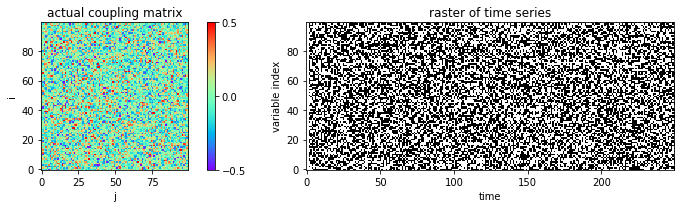

In [3]:
plt.figure(figsize=(12,3))

plt.subplot2grid((1,2),(0,0))
plt.title('actual coupling matrix')
plt.imshow(w0,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,2),(0,1),colspan=2)
plt.title('raster of time series')
plt.imshow(s.T[:,:250],cmap='gray',origin='lower')
plt.xlabel('time')
plt.ylabel('variable index')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

Now, from the time series, we will recover the coupling matrix.


In [4]:
nloop = 300
w = inference.fem(s,nloop)

We plot the heat map of predicted coupling matrix `W` and compare with the actual couplings `W0`:

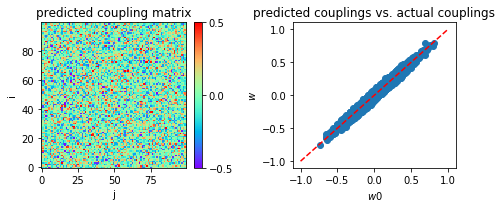

In [5]:
plt.figure(figsize=(7,3))

plt.subplot2grid((1,2),(0,0))
plt.title('predicted coupling matrix')
plt.imshow(w,cmap='rainbow',origin='lower')
plt.xlabel('j')
plt.ylabel('i')
plt.clim(-0.5,0.5)
plt.colorbar(fraction=0.045, pad=0.05,ticks=[-0.5,0,0.5])

plt.subplot2grid((1,2),(0,1))
plt.title('predicted couplings vs. actual couplings')
plt.plot([-1,1],[-1,1],'r--')
plt.scatter(w0,w)
plt.xlabel('$w0$')
plt.ylabel('$w$')

plt.tight_layout(h_pad=1, w_pad=1.5)
plt.show()

The inference accuracy is measured by mean square error between actual couplings and predicted couplings: MSE = $\frac{1}{N^{2}} \sum_{i,j=1}^N (W_{ij} - W_{ij}^{\text{actual}})$ 

In [6]:
MSE = np.mean(w-w0)
print('MSE:',MSE)

('MSE:', 0.000642535816615451)
